# Technical Indicators testing with Machine Learning

## Model Analysis

In [1]:
# Requirements - Uncomment to install in your system
%pip install statsmodels plotly scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Ensure compatible versions of scipy and statsmodels
%pip install --upgrade scipy
%pip install --upgrade statsmodels

# After running this cell, please restart the kernel to ensure the new versions are used.

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

import numpy as np

def lazywhere(cond, arrays, f, f2=None, fillvalue=np.nan):
    # Roughly mimics what _lazywhere did
    cond = np.asarray(cond)
    out = np.full(cond.shape, fillvalue, dtype=np.result_type(*arrays))
    out[cond] = f(*[arr[cond] for arr in arrays])
    if f2 is not None:
        out[~cond] = f2(*[arr[~cond] for arr in arrays])
    return out

  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl (38.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.0
    Uninstalling scipy-1.15.0:
      Successfully uninstalled scipy-1.15.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.3
    Uninstalling statsmodels-0.14.3:
      Successfully uninstalled statsmodels-0.14.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (c:\Users\LENOVO\Documents\GISMA\Data Mining\Stock-Predictions\data_mining_env\Lib\site-packages\scipy\_lib\_util.py)

In [ ]:
import sys, pathlib
# Go up to project root, then into Main/
main_path = pathlib.Path("..", "Main").resolve()
sys.path.append(str(main_path))

In [ ]:
# Loading the data
from data_collection import StockDataCollector
from data_cleaning import StockDataCleaner

# 1. Collect data
collector = StockDataCollector(historical_data_path='../Datasets/Historical Data') # specify the path of dataset dir
collector.collect_data()

# 2. Clean data
cleaner = StockDataCleaner()
cleaned_data = cleaner.clean_all(collector)

Looking for data in: c:\Users\LENOVO\Documents\GISMA\Data Mining\Stock-Predictions\Datasets\Historical Data
Successfully loaded 5 tickers


In [ ]:
# Using Apple data
AAPL = cleaned_data["AAPL"]
print(f"Apple Stock: \n{AAPL}")

Apple Stock: 
           Date    Close     Volume      Open      High       Low
0    2025-06-13  196.450   51447350  199.7300  200.3700  195.7000
1    2025-06-12  199.200   43904640  199.0800  199.6800  197.3601
2    2025-06-11  198.780   60989860  203.5000  204.5000  198.4100
3    2025-06-10  202.670   54672610  200.6000  204.3500  200.5700
4    2025-06-09  201.450   72862560  204.3900  206.0000  200.0200
...         ...      ...        ...       ...       ...       ...
2511 2015-06-19   31.650  217446120   31.9275   31.9550   31.6000
2512 2015-06-18   31.970  141455960   31.8075   32.0775   31.8050
2513 2015-06-17   31.825  131435600   31.9300   31.9700   31.6850
2514 2015-06-16   31.900  125774600   31.7575   31.9625   31.5925
2515 2015-06-15   31.730  175587840   31.5250   31.8100   31.4275

[2516 rows x 6 columns]


In [ ]:
# Shifting data backward by one day to ensure no data leakage
AAPL['Previous_Close'] = AAPL['Close'].shift(1)  # Add previous day's close as a feature
AAPL['Close_shifted'] = AAPL['Close'].shift(1)
AAPL['Open_shifted'] = AAPL['Open'].shift(1)
AAPL['High_shifted'] = AAPL['High'].shift(1)
AAPL['Low_shifted'] = AAPL['Low'].shift(1)

AAPL.head(10)

,Date,Close,Volume,Open,High,Low,Previous_Close,Close_shifted,Open_shifted,High_shifted,Low_shifted
0,2025-06-13,196.45,51447350,199.73,200.37,195.7000,NaN,NaN,NaN,NaN,NaN
1,2025-06-12,199.20,43904640,199.08,199.68,197.3601,196.45,196.45,199.73,200.37,195.7000
2,2025-06-11,198.78,60989860,203.50,204.50,198.4100,199.20,199.20,199.08,199.68,197.3601
3,2025-06-10,202.67,54672610,200.60,204.35,200.5700,198.78,198.78,203.50,204.50,198.4100
4,2025-06-09,201.45,72862560,204.39,206.00,200.0200,202.67,202.67,200.60,204.35,200.5700
5,2025-06-06,203.92,46607690,203.00,205.70,202.0500,201.45,201.45,204.39,206.00,200.0200
6,2025-06-05,200.63,55221240,203.50,204.75,200.1500,203.92,203.92,203.00,205.70,202.0500
7,2025-06-04,202.82,43603990,202.91,206.24,202.1000,200.63,200.63,203.50,204.75,200.1500
8,2025-06-03,203.27,46381570,201.35,203.77,200.9550,202.82,202.82,202.91,206.24,202.1000
9,2025-06-02,201.70,35423290,200.28,202.13,200.1200,203.27,203.27,201.35,203.77,200.9550


In [ ]:
# Calculating Technical Indicators for Apple from the technical_indicators.py file
from technical_indicators import TechnicalIndicators

aapl_with_indicators = TechnicalIndicators.calculate_all_indicators(AAPL)
aapl_with_indicators.head(10)

,Date,Close,Volume,Open,High,Low,Previous_Close,Close_shifted,Open_shifted,High_shifted,...,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,Stoch_%K,Stoch_%D,BB_Upper,BB_Lower,ATR
0,2025-06-13,196.45,51447350,199.73,200.37,195.7000,NaN,NaN,NaN,NaN,...,196.450000,0.000000,0.000000,0.000000,100.000000,16.059957,16.059957,196.450000,196.450000,0.0
1,2025-06-12,199.20,43904640,199.08,199.68,197.3601,196.45,196.45,199.73,200.37,...,196.653704,0.219373,0.043875,0.175499,100.000000,74.946467,45.503212,200.575000,195.075000,0.0
2,2025-06-11,198.78,60989860,203.50,204.50,198.4100,199.20,199.20,199.08,199.68,...,196.811207,0.355243,0.106148,0.249094,85.875571,35.000000,42.002141,200.562498,195.724169,0.0
3,2025-06-10,202.67,54672610,200.60,204.35,200.5700,198.78,198.78,203.50,204.50,...,197.245192,0.767958,0.238510,0.529448,94.136373,79.204545,63.050337,203.719918,194.830082,0.0
4,2025-06-09,201.45,72862560,204.39,206.00,200.0200,202.67,202.67,200.60,204.35,...,197.556659,0.985237,0.387856,0.597381,78.608387,55.825243,56.676596,204.049751,195.370249,0.0
5,2025-06-06,203.92,46607690,203.00,205.70,202.0500,201.45,201.45,204.39,206.00,...,198.028018,1.341279,0.578540,0.762739,84.266818,79.805825,71.611871,205.465502,195.357831,0.0
6,2025-06-05,200.63,55221240,203.50,204.75,200.1500,203.92,203.92,203.00,205.70,...,198.220757,1.342494,0.731331,0.611163,61.087971,47.864078,61.165049,205.124294,195.761420,0.0
7,2025-06-04,202.82,43603990,202.91,206.24,202.1000,200.63,200.63,203.50,204.75,...,198.561442,1.502848,0.885634,0.617213,67.496992,67.552182,65.074028,205.392806,196.087194,0.0
8,2025-06-03,203.27,46381570,201.35,203.77,200.9550,202.82,202.82,202.91,206.24,...,198.910224,1.647252,1.037958,0.609294,68.639969,71.821632,62.412631,205.687153,196.355069,0.0
9,2025-06-02,201.70,35423290,200.28,202.13,200.1200,203.27,203.27,201.35,203.77,...,199.116874,1.616375,1.153641,0.462733,60.629309,56.925996,65.433270,205.534298,196.643702,0.0


In [ ]:
# Drop rows with null values
aapl_with_indicators.dropna(inplace=True)
aapl_with_indicators

,Date,Close,Volume,Open,High,Low,Previous_Close,Close_shifted,Open_shifted,High_shifted,...,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,Stoch_%K,Stoch_%D,BB_Upper,BB_Lower,ATR
1,2025-06-12,199.200,43904640,199.0800,199.6800,197.3601,196.4500,196.4500,199.7300,200.3700,...,196.653704,0.219373,0.043875,0.175499,100.000000,74.946467,45.503212,200.575000,195.075000,0.000000
2,2025-06-11,198.780,60989860,203.5000,204.5000,198.4100,199.2000,199.2000,199.0800,199.6800,...,196.811207,0.355243,0.106148,0.249094,85.875571,35.000000,42.002141,200.562498,195.724169,0.000000
3,2025-06-10,202.670,54672610,200.6000,204.3500,200.5700,198.7800,198.7800,203.5000,204.5000,...,197.245192,0.767958,0.238510,0.529448,94.136373,79.204545,63.050337,203.719918,194.830082,0.000000
4,2025-06-09,201.450,72862560,204.3900,206.0000,200.0200,202.6700,202.6700,200.6000,204.3500,...,197.556659,0.985237,0.387856,0.597381,78.608387,55.825243,56.676596,204.049751,195.370249,0.000000
5,2025-06-06,203.920,46607690,203.0000,205.7000,202.0500,201.4500,201.4500,204.3900,206.0000,...,198.028018,1.341279,0.578540,0.762739,84.266818,79.805825,71.611871,205.465502,195.357831,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2015-06-19,31.650,217446120,31.9275,31.9550,31.6000,31.9025,31.9025,31.8725,32.0150,...,31.241511,0.376613,0.427048,-0.050435,55.028384,69.754253,74.291115,32.560552,30.450068,0.651875
2512,2015-06-18,31.970,141455960,31.8075,32.0775,31.8050,31.6500,31.6500,31.9275,31.9550,...,31.295473,0.376786,0.416995,-0.040210,58.094801,73.553719,74.202846,32.480025,30.487095,0.635848
2513,2015-06-17,31.825,131435600,31.9300,31.9700,31.6850,31.9700,31.9700,31.8075,32.0775,...,31.334697,0.361060,0.405808,-0.044748,56.224043,58.540630,67.282867,32.434050,30.502820,0.610788
2514,2015-06-16,31.900,125774600,31.7575,31.9625,31.5925,31.8250,31.8250,31.9300,31.9700,...,31.376572,0.350608,0.394768,-0.044160,56.995431,58.646617,63.580322,32.457005,30.499365,0.593589


In [ ]:
print(aapl_with_indicators.columns.tolist())

['Date', 'Close', 'Volume', 'Open', 'High', 'Low', 'Previous_Close', 'Close_shifted', 'Open_shifted', 'High_shifted', 'Low_shifted', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'Stoch_%K', 'Stoch_%D', 'BB_Upper', 'BB_Lower', 'ATR']


In [ ]:
## Modeling

# Parameters
window_size = 20  # 4 weeks of trading days (5 days per week * 4)

# List of indicators to test
indicators = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'Stoch_%K', 'Stoch_%D', 'BB_Upper', 'BB_Lower', 'ATR', 'Close_shifted', 'Previous_Close']
# Telling whether the Technical Indicators outperform the previous day price 

# Initialize a dictionary to store predictions, actuals, daily MAE for each indicator
results = {indicator: {'predictions': [], 'actual': [], 'daily_mae': []} for indicator in indicators}

In [ ]:
"""Loop over multiple 20-Day Train Datasets for Model Building and Next Day Test Datasets for Model Evaluation"""

for i in range(window_size, len(AAPL) - 1):
    train_AAPL = AAPL.iloc[i - window_size:i]  # Training window 
    test_index = i + 1  # Index of next day's prediction
    actual_close_price = AAPL['Close'].iloc[test_index]  # Next day's actual closing price

    # Individual indicators as predictors (plus Previous_Close)
    for indicator in indicators[:-1]:  # Exclude Previous_Close from standalone tests
        X_train = train_AAPL[[indicator, 'Previous_Close']]
        y_train = train_AAPL['Close']
        X_train = sm.add_constant(X_train)  # Add constant for intercept

        model = sm.OLS(y_train, X_train).fit()
        X_test = pd.DataFrame({indicator: [AAPL[indicator].iloc[test_index]], 'Previous_Close': [AAPL['Previous_Close'].iloc[test_index]]})
        X_test = sm.add_constant(X_test, has_constant='add')  # Add constant for prediction

        prediction = model.predict(X_test)[0]
        results[indicator]['predictions'].append(prediction)
        results[indicator]['actual'].append(actual_close_price)
        
        daily_mae = mean_absolute_error([actual_close_price], [prediction])
        results[indicator]['daily_mae'].append(daily_mae)

In [ ]:
"""Prediction Evaluation"""
# Calculate accuracy metrics (MAE, MSE) for each individual indicator and the combined model
accuracy_data = {
    'Indicator': [],
    'MAE': [],
    'MSE': []
}

for indicator in indicators[:-1]:  # Exclude Previous_Close from standalone tests in accuracy table
    if results[indicator]['actual']:  # Check if there are results for this indicator
        mae = mean_absolute_error(results[indicator]['actual'], results[indicator]['predictions'])
        mse = mean_squared_error(results[indicator]['actual'], results[indicator]['predictions'])
        accuracy_data['Indicator'].append(indicator)
        accuracy_data['MAE'].append(mae)
        accuracy_data['MSE'].append(mse)


# Create accuracy DataFrame
accuracy_df = pd.DataFrame(accuracy_data).sort_values(by='MAE').reset_index(drop=True)
accuracy_df

,Indicator,MAE,MSE
0,RSI,1.233169,3.432200
1,Stoch_%K,1.482561,5.783478
2,Close_shifted,1.521410,6.135998
3,MACD,1.707117,7.520347
4,MACD_Signal,1.719384,8.208561
5,ATR,1.734720,8.405694
6,Stoch_%D,1.756157,8.607929
7,EMA_12,1.758338,8.079776
8,EMA_26,1.765625,8.198523
9,SMA_200,1.768531,8.228864


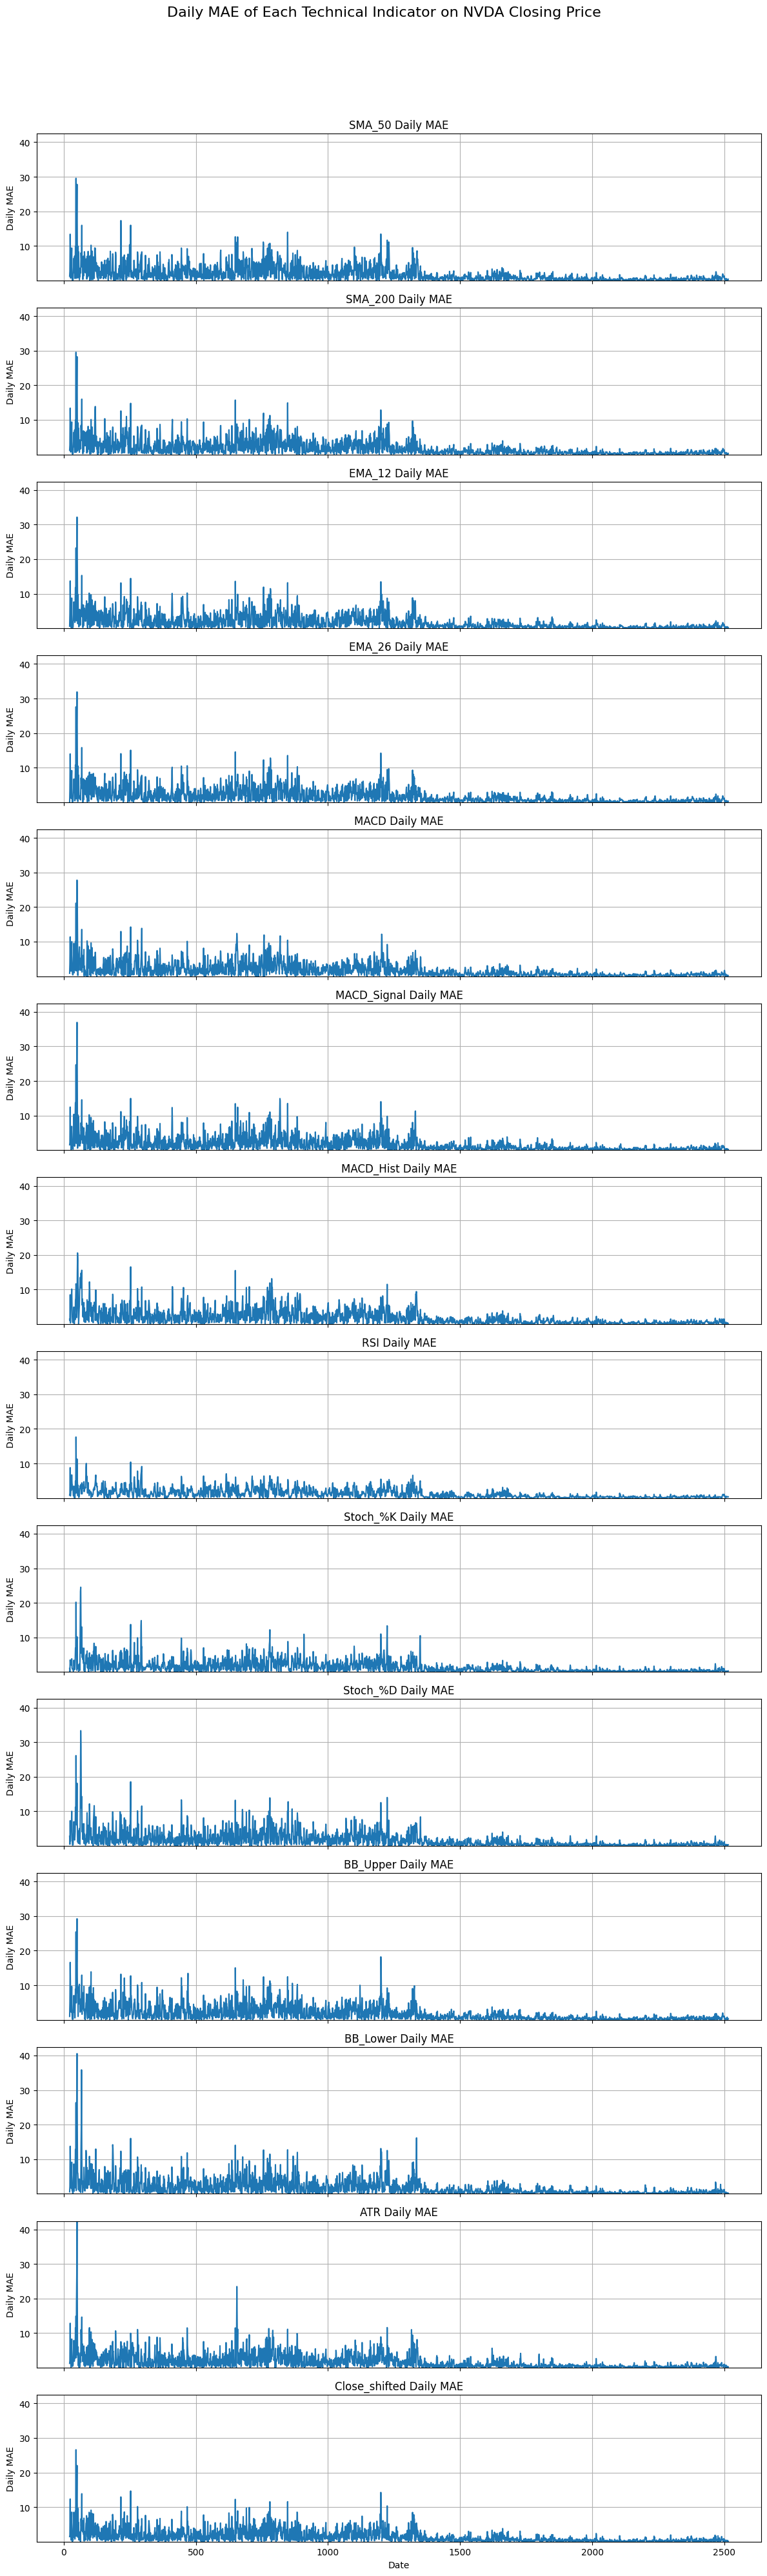

In [ ]:
"""Plotting Results"""

# Number of indicators (excluding the last one, similar to your slicing with indicators[:-1])
num_indicators = len(indicators) - 1

# Set up subplots
fig, axes = plt.subplots(num_indicators, 1, figsize=(12, 3 * num_indicators), sharex=True)

# Find the global y-axis range across all indicators
y_values = [results[ind]['daily_mae'] for ind in indicators[:-1]]
y_min = min(min(y) for y in y_values)
y_max = max(max(y) for y in y_values)

# Loop through each subplot and plot
for idx, indicator in enumerate(indicators[:-1]):
    ax = axes[idx] if num_indicators > 1 else axes
    ax.plot(AAPL.index[window_size + 1:], results[indicator]['daily_mae'], label=f'{indicator} Daily MAE')
    ax.set_ylabel('Daily MAE')
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'{indicator} Daily MAE')
    ax.grid(True)

# Set x-axis label only for the bottom plot
axes[-1].set_xlabel('Date')

# Final layout adjustments
plt.suptitle("Daily MAE of Each Technical Indicator on NVDA Closing Price", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


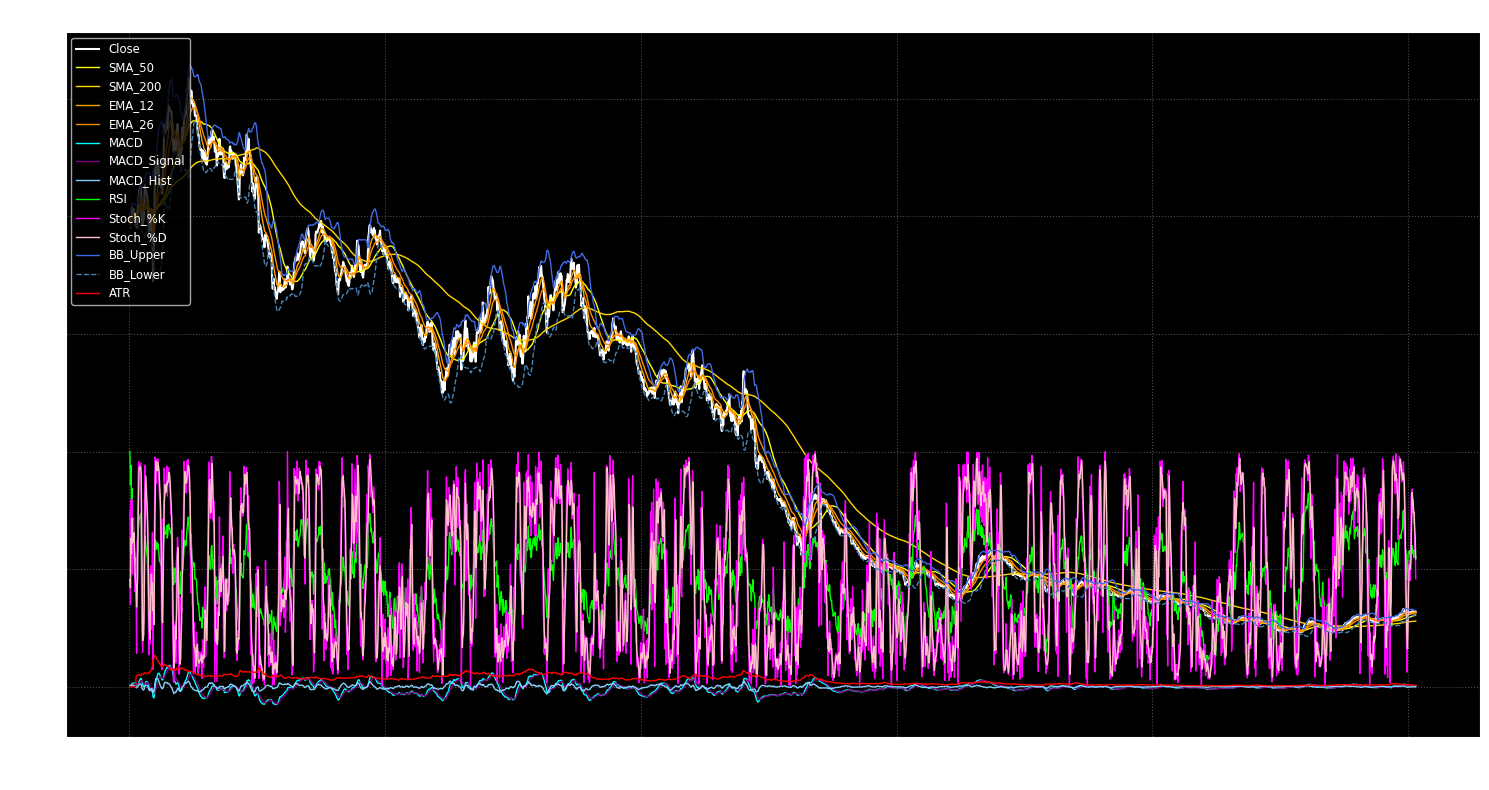

In [ ]:
## Generated using GPT

# ── Indicators to plot ─────────────────────────────────────────────
indicators = [
    'SMA_50', 'SMA_200',
    'EMA_12', 'EMA_26',
    'MACD', 'MACD_Signal', 'MACD_Hist',
    'RSI',
    'Stoch_%K', 'Stoch_%D',
    'BB_Upper', 'BB_Lower',
    'ATR'
]

# ── Color palette ─────────────────────────────────────────────────
palette = {
    'Close': 'white',
    'SMA_50': 'yellow',
    'SMA_200': 'gold',
    'EMA_12': 'orange',
    'EMA_26': 'darkorange',
    'MACD': 'cyan',
    'MACD_Signal': 'purple',
    'MACD_Hist': 'lightskyblue',
    'RSI': 'lime',
    'Stoch_%K': 'magenta',
    'Stoch_%D': 'pink',
    'BB_Upper': 'royalblue',
    'BB_Lower': 'steelblue',
    'ATR': 'red'
}

# ── Plot setup ─────────────────────────────────────────────────────
plt.figure(figsize=(15, 8))
plt.style.use('dark_background')  # dark theme like plotly_dark

# ── Plot Close price ───────────────────────────────────────────────
plt.plot(AAPL.index, AAPL['Close'], label='Close', color=palette['Close'], linewidth=1.5)

# ── Plot each indicator ────────────────────────────────────────────
for ind in indicators:
    if ind in AAPL.columns:
        linestyle = '--' if ind == 'BB_Lower' else '-'  # Dashed for BB_Lower
        plt.plot(AAPL.index, AAPL[ind], label=ind, color=palette[ind], linewidth=1, linestyle=linestyle)
    else:
        print(f"⚠️  {ind} not found in DataFrame; skipping.")

# ── Labels and legend ──────────────────────────────────────────────
plt.title('NVDA Close Price with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True, linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()
